# 数据预处理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label) # 独特 方便计算交叉熵损失

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', # 权重初始化 正态分布
                activation='relu'))

In [9]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 训练模型

In [11]:
#from keras.optimizers import Adam
#adam_optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0)
#model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 1s - loss: 0.4388 - accuracy: 0.8845 - val_loss: 0.2227 - val_accuracy: 0.9377 - 1s/epoch - 5ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1917 - accuracy: 0.9461 - val_loss: 0.1576 - val_accuracy: 0.9556 - 561ms/epoch - 2ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1350 - accuracy: 0.9621 - val_loss: 0.1250 - val_accuracy: 0.9639 - 560ms/epoch - 2ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1033 - accuracy: 0.9708 - val_loss: 0.1106 - val_accuracy: 0.9686 - 564ms/epoch - 2ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0814 - accuracy: 0.9774 - val_loss: 0.0975 - val_accuracy: 0.9712 - 556ms/epoch - 2ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.0929 - val_accuracy: 0.9718 - 562ms/epoch - 2ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0545 - accuracy: 0.9849 - val_loss: 0.0829 - val_accuracy: 0.9759 - 560ms/epoch - 2ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.0873 - val_accuracy: 0.9740 - 555ms/epoch - 2ms/step
Epo

# 以图形显示训练过程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

In [1]:
show_train_history(train_history,'loss','val_loss')

NameError: name 'show_train_history' is not defined

# 评估模型准确率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9782

accuracy= 0.9782000184059143


# 进行预测

In [16]:
prediction=model.predict_classes(x_Test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [19]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

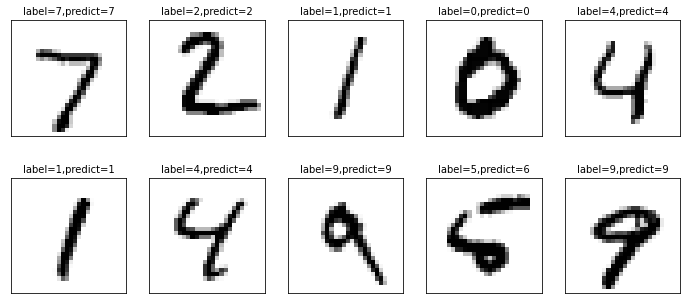

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [22]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,1,3,0,3,1,1,0
1,0,1121,5,0,0,1,2,0,6,0
2,4,0,1004,1,3,0,4,8,8,0
3,2,0,8,986,0,3,0,3,6,2
4,0,0,2,0,970,0,4,0,1,5
5,3,0,0,7,4,860,8,2,6,2
6,6,3,2,1,2,3,938,0,3,0
7,1,5,10,5,2,0,0,995,3,7
8,3,1,2,5,2,3,2,2,951,3


In [23]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [24]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
1670,5,3
2597,5,3
5937,5,3
5972,5,3
9482,5,3


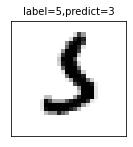

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

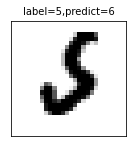

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)